# Temperature Data Cleaning and Calculations

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('../../project4_big_data/temp_2020_2024/reanalysis-era5-land-timeseries-sfc-2m-temperature_pljksqj.csv')

In [3]:
df.head()

,valid_time,t2m,latitude,longitude
0,2020-01-01 00:00:00,290.65353,10.0,10.0
1,2020-01-01 01:00:00,290.01096,10.0,10.0
2,2020-01-01 02:00:00,289.42648,10.0,10.0
3,2020-01-01 03:00:00,288.85318,10.0,10.0
4,2020-01-01 04:00:00,288.34167,10.0,10.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48648 entries, 0 to 48647
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   valid_time  48648 non-null  object 
 1   t2m         48648 non-null  float64
 2   latitude    48648 non-null  float64
 3   longitude   48648 non-null  float64
dtypes: float64(3), object(1)
memory usage: 1.5+ MB


In [5]:
df['valid_time'].nunique()

48648

In [6]:
type(df['valid_time'][15])

str

In [7]:
df['valid_time'][2361]

'2020-04-08 09:00:00'

In [8]:
date1 = datetime.fromisoformat(df['valid_time'][2361])

date1

datetime.datetime(2020, 4, 8, 9, 0)

In [9]:
date1.year

2020

In [11]:
date1.month

4

In [12]:
date1.day

8

In [13]:
date1.hour

9

In [14]:
date1.minute

0

In [11]:
data = df

In [12]:
for i in data.index:
    date = datetime.fromisoformat(df.loc[i,'valid_time'])
    df.loc[i,'datetime'] = date
    df.loc[i,'year'] = date.year
    df.loc[i,'month'] = date.month
    df.loc[i,'day'] = date.day
    df.loc[i,'hour'] = date.hour
    df.loc[i,'temp_C'] = df.loc[i,'t2m'] - 273.15

In [13]:
df

,valid_time,t2m,latitude,longitude,datetime,year,month,day,hour,temp_C
0,2020-01-01 00:00:00,290.65353,10.0,10.0,2020-01-01 00:00:00,2020.0,1.0,1.0,0.0,17.50353
1,2020-01-01 01:00:00,290.01096,10.0,10.0,2020-01-01 01:00:00,2020.0,1.0,1.0,1.0,16.86096
2,2020-01-01 02:00:00,289.42648,10.0,10.0,2020-01-01 02:00:00,2020.0,1.0,1.0,2.0,16.27648
3,2020-01-01 03:00:00,288.85318,10.0,10.0,2020-01-01 03:00:00,2020.0,1.0,1.0,3.0,15.70318
4,2020-01-01 04:00:00,288.34167,10.0,10.0,2020-01-01 04:00:00,2020.0,1.0,1.0,4.0,15.19167
...,...,...,...,...,...,...,...,...,...,...
48643,2025-07-19 19:00:00,297.60180,10.0,10.0,2025-07-19 19:00:00,2025.0,7.0,19.0,19.0,24.45180
48644,2025-07-19 20:00:00,296.91626,10.0,10.0,2025-07-19 20:00:00,2025.0,7.0,19.0,20.0,23.76626
48645,2025-07-19 21:00:00,296.17430,10.0,10.0,2025-07-19 21:00:00,2025.0,7.0,19.0,21.0,23.02430
48646,2025-07-19 22:00:00,296.05005,10.0,10.0,2025-07-19 22:00:00,2025.0,7.0,19.0,22.0,22.90005


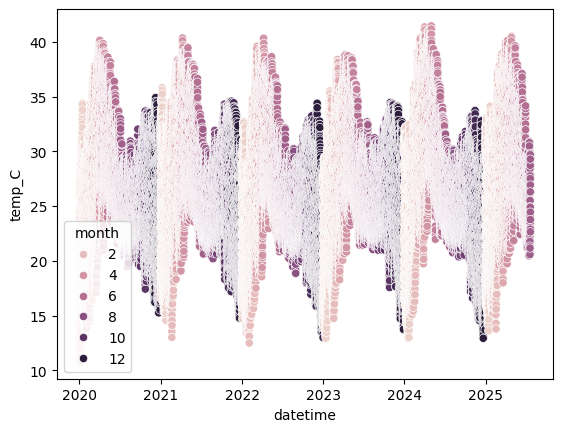

In [14]:
fig, ax = plt.subplots()

sns.scatterplot(data=df, x='datetime', y='temp_C', hue='month');

In [15]:
df.loc[0:23,'temp_C'].agg(['mean', 'max', 'min'])

mean    20.529734
max     27.177030
min     14.425740
Name: temp_C, dtype: float64

In [16]:
daily_temp = pd.DataFrame(columns=['date', 'mean', 'max', 'min', 'latitude', 'longitude'])

In [17]:
for n in range(0,len(df),24):
    daily_temp.loc[n/24, 'date'] = df.loc[n+6,'datetime']
    daily_temp.loc[n/24, 'mean'] = df.loc[n:n+23,'temp_C'].mean()
    daily_temp.loc[n/24, 'max'] = df.loc[n:n+23,'temp_C'].max()
    daily_temp.loc[n/24, 'min'] = df.loc[n:n+23,'temp_C'].min()
    daily_temp.loc[n/24, 'latitude'] = df.loc[n+6,'latitude']
    daily_temp.loc[n/24, 'longitude'] = df.loc[n+6, 'longitude']

In [20]:
daily_temp

,date,mean,max,min,latitude,longitude
0,2020-01-01 06:00:00,20.529734,27.17703,14.42574,10.0,10.0
1,2020-01-02 06:00:00,17.421294,23.0143,12.54495,10.0,10.0
2,2020-01-03 06:00:00,17.071994,23.90963,10.77706,10.0,10.0
3,2020-01-04 06:00:00,18.296456,24.8557,12.02285,10.0,10.0
4,2020-01-05 06:00:00,20.109093,26.99755,13.6447,10.0,10.0
...,...,...,...,...,...,...
2022,2025-07-15 06:00:00,25.569944,30.86776,21.50295,10.0,10.0
2023,2025-07-16 06:00:00,24.951818,29.53567,22.46517,10.0,10.0
2024,2025-07-17 06:00:00,24.102943,26.89803,22.19045,10.0,10.0
2025,2025-07-18 06:00:00,24.92611,29.14456,20.57583,10.0,10.0


In [19]:
daily_temp.to_csv('../data/temp/temp_lat=+10_long=+10.csv')

In [32]:
data_directory = '../../project4_big_data/temp_2020_2024/'

In [2]:
df = pd.read_csv('../../project4_big_data/temp_2020_2024/reanalysis-era5-land-timeseries-sfc-2m-temperature_pljksqj.csv')

In [36]:
# list of csv data files
file_list= os.listdir('../../project4_big_data/temp_2020_2024')

In [37]:
len(file_list)

702

In [38]:
status_notes = []

In [39]:
for file in file_list:
    file_path = data_directory + file
    df = pd.read_csv(file_path)
    status_entry = {}
    lat = np.round(df.loc[1234,'latitude'])
    long = np.round(df.loc[1234,'longitude'])
    status_entry['latitude'] = lat
    status_entry['longitude'] = long
    
    # check if temperature is recorded for this file
    temp_nulls = df['t2m'].isnull().sum()
    
    if temp_nulls == 0: 
        status_entry['temp_data_present'] = f"yes"

        # format date and convert temperature to Celsius
        for i in data.index:
            date = datetime.fromisoformat(df.loc[i,'valid_time'])
            df.loc[i,'datetime'] = date
            df.loc[i,'year'] = date.year
            df.loc[i,'month'] = date.month
            df.loc[i,'day'] = date.day
            df.loc[i,'hour'] = date.hour
            df.loc[i,'temp_C'] = df.loc[i,'t2m'] - 273.15

        # construct dataframe with temperature
        daily_temp = pd.DataFrame(columns=['date', 'temp_mean', 'temp_max', 'temp_min', 'latitude', 'longitude'])

        # calculate daily average, min, and max temperatures
        for n in range(0,len(df),24):
            daily_temp.loc[n/24, 'date'] = df.loc[n+6,'datetime']
            daily_temp.loc[n/24, 'temp_mean'] = df.loc[n:n+23,'temp_C'].mean()
            daily_temp.loc[n/24, 'temp_max'] = df.loc[n:n+23,'temp_C'].max()
            daily_temp.loc[n/24, 'temp_min'] = df.loc[n:n+23,'temp_C'].min()
            daily_temp.loc[n/24, 'latitude'] = df.loc[n+6,'latitude']
            daily_temp.loc[n/24, 'longitude'] = df.loc[n+6, 'longitude']
        
        file_path = f"../data/temp/temp_lat={lat}_long={long}.csv"
        
        daily_temp.to_csv(file_path)
    
    elif temp_nulls == len(df):
        status_entry['temp_data_present'] = f"no"
    
    else:
        status_entry['temp_data_present'] = f"some: {temp_nulls} missing"
        
    status_notes.append(status_entry)
    print(lat, long, status_entry['temp_data_present'])

status_notes.to_csv('../data/temp/temp_status_notes.csv')

-40.0 100.0 no
-30.0 160.0 no
50.0 -10.0 no
70.0 130.0 yes
-80.0 -100.0 yes
40.0 -50.0 no
-40.0 -20.0 no
-10.0 -80.0 no
60.0 10.0 yes
10.0 160.0 no
-60.0 -10.0 no
-80.0 -70.0 yes
-80.0 80.0 yes
-10.0 60.0 no
20.0 70.0 no
-20.0 -40.0 no
80.0 80.0 no
-30.0 150.0 yes
80.0 60.0 no
-70.0 -130.0 no
-50.0 -30.0 no
-50.0 100.0 no
20.0 -20.0 no
-61.0 -180.0 no
-40.0 70.0 no
0.0 0.0 no
30.0 170.0 no
30.0 -120.0 no
52.0 -0.0 yes
-50.0 120.0 no
-50.0 -40.0 no
40.0 -90.0 yes
30.0 20.0 yes
-80.0 -140.0 yes
-27.0 -180.0 no
10.0 -80.0 no
-80.0 160.0 yes
60.0 40.0 yes
50.0 70.0 yes
10.0 -40.0 no
40.0 40.0 yes
-88.0 -180.0 yes
70.0 -170.0 no
-16.0 -180.0 no
-21.0 -180.0 no
80.0 150.0 no
80.0 -90.0 yes
30.0 100.0 yes
-30.0 -160.0 no
50.0 130.0 yes
40.0 -70.0 no
-30.0 -80.0 no
40.0 150.0 no
50.0 -30.0 no
-70.0 40.0 yes
-20.0 90.0 no
40.0 20.0 yes
50.0 100.0 yes
-70.0 -180.0 no
80.0 -70.0 no
70.0 80.0 yes
-40.0 170.0 no
80.0 -110.0 no
80.0 90.0 no
-70.0 -70.0 yes
-70.0 120.0 yes
-32.0 -180.0 no
70.0 -40.0 

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc0 in position 10: invalid start byte